- opencv-python : main 모듈
- opencv-contrib-python : 추가 extra 모듈

In [2]:
# 라이브러리 import
import cv2

### 영상 불러오기

#### 이미지 로딩 및 출력

In [2]:
img = cv2.imread("./dog/1.png",
                 cv2.IMREAD_COLOR) # 파일경로, 컬러 or 흑백 등으로 읽어들일 속성
cv2.imshow("image",img) # 새로운 창의 타이틀, 실제사진
cv2.waitKey(0) # 키보드 입력까지 대기 => 대기시간(ms)
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [19]:
img = cv2.imread("./dog/1.png",
                 cv2.IMREAD_GRAYSCALE) # 파일경로, 컬러 or 흑백 등으로 읽어들일 속성
cv2.imshow("image",img) # 새로운 창의 타이틀, 실제사진
cv2.waitKey(0) # 키보드 입력까지 대기 => 대기시간(ms)
cv2.destroyAllWindows()

In [4]:
#matplotlib 활용 출력
import matplotlib.pyplot as plt

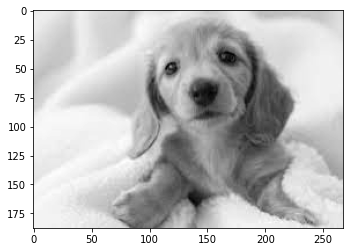

In [25]:
img = cv2.imread("./dog/1.png",
                 cv2.IMREAD_GRAYSCALE) # 파일경로, 컬러 or 흑백 등으로 읽어들일 속성
plt.imshow(img, cmap='gray')
plt.show()

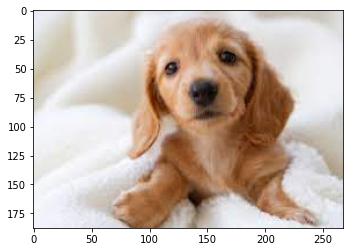

In [27]:
img = cv2.imread("./dog/1.png",
                 cv2.IMREAD_COLOR) # 파일경로, 컬러 or 흑백 등으로 읽어들일 속성
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

#### 이진이미지
- 컬러 이미지 : RGB 등의 색상으로 이루어진 이미지
- 그레이 이미지 : 0 ~ 255사이의 흑백톤으로 이루어진 이미지
- 이진 이미지 : 0 or 255 / 0 or 1로 구성된 이미지

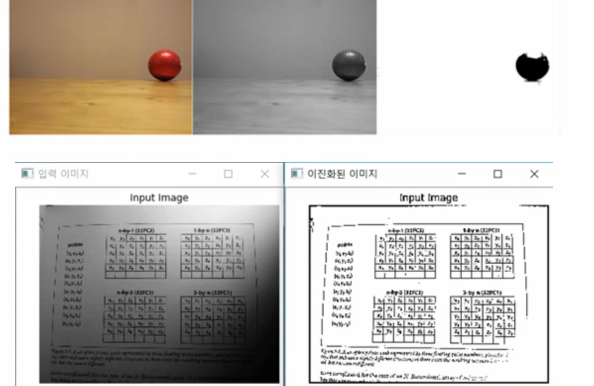

#### 동영상 로딩 및 출력

In [6]:
try : 
    print("영상로딩을 시작합니다..")
    video_cap = cv2.VideoCapture("./movie2.mp4")
except :
    print("영상로딩 실패")

영상로딩을 시작합니다..


In [7]:
# 영상 frame 읽기
ret, frame = video_cap.read() # 영상읽기

if ret :
    cv2.imshow("video",frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
video_cap.release() # 비디오 객체를 메모리에서 해제

In [8]:
frame.shape

(720, 1280, 3)

In [35]:
#반복문 이용해서 영상 출력하기
try : 
    print("영상로딩을 시작합니다..")
    video_cap = cv2.VideoCapture("./movie2.mp4")
    
    while True:
        ret,frame = video_cap.read()
        
        if ret :
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
            cv2.imshow("video",gray_frame)
            k = cv2.waitKey(41) # 초당 프레임수를 맞추기 위함 : 1000/24
        else:
            break;
            
        if k == 27 : #27번은 ESC
            break;
            
    cv2.destroyAllWindows()
    video_cap.release()
except :
    print("영상로딩 실패")

영상로딩을 시작합니다..


#### 특정색상 검출

In [10]:
fruits_img = cv2.imread("./fruits.jpg")
fruits_img_HSV = cv2.cvtColor(fruits_img,cv2.COLOR_BGR2HSV)

# 빨간색 영역 검출 (0~5와 170~179 영역을 병합)
lower_red = cv2.inRange(fruits_img_HSV, (0, 100, 100), (5, 255, 255))
upper_red = cv2.inRange(fruits_img_HSV, (170, 100, 100), (180, 255, 255))
added_red = cv2.addWeighted(lower_red, 1.0, upper_red, 1.0, 0.0)

# 원본에서 빨간색 영역 사진 분리
result = cv2.bitwise_and(fruits_img,fruits_img,mask=added_red)

cv2.imshow("origin",fruits_img)
cv2.imshow("HSV",fruits_img_HSV)
cv2.imshow("red_HSV",added_red)
cv2.imshow("origin_red",result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
# 노란색 영역 추출
yellow = cv2.inRange(fruits_img_HSV, (25, 100, 100), (28, 255, 255))
result = cv2.bitwise_and(fruits_img,fruits_img,mask=yellow)

cv2.imshow("binary_yellow",yellow)
cv2.imshow("origin_yellow",result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 처리 방법
1. 픽셀 기반 처리 : 픽셀값을 직접 처리
2. 영역 기반 처리 : 픽셀을 그룹화해서 처리 -> 히스토그램 -> 분포의 확률
3. 주파수 기반 처리 : 픽셀값을 주파수로 변환하여 처리 -> 푸리에 변환
    - 주파수라는 것은 파동의 떨림이 얼마나 자주 일어나는가를 정의

#### 픽셀기반처리(ROI : Region of Image 영역 검출)

In [46]:
dog_img =cv2.imread("./dog/2.png")
print(dog_img.shape)

dog_face_img = dog_img[40:130, 70:150] # 행, 열

cv2.imshow("dog",dog_img)
cv2.imshow("dog_face_img",dog_face_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(224, 224, 3)


#### ROI 영역에 그리기 함수 사용
- cv2.line(이미지, 시작점 좌표, 끝점 좌표, 색상, 두께) : 선 그리기
- cv2.circle(이미지, 중심 좌표, 반지름, 색상, 두께) : 원 그리기
- cv2.rectangle(이미지, 좌상단 좌표, 우하단 좌표, 색상, 두께) : 사각형 그리기
- cv2.eilipse(이미지, 중심좌표, 장축길이/단축길이, 시작각도, 끝각도, 색상, 두께) : 타원그리기
- cv2.putText(이미지, 출력내용, 시작좌표, 폰트, 크기, 색상, 굵기) : 텍스트 출력

In [63]:
dog_img =cv2.imread("./dog/2.png")

# ROI영역에 사각형 그리기
cv2.rectangle(dog_img,(70,40),(150,130),(255,0,0),2)
cv2.circle(dog_img,(110,85),50,(0,0,255),2)

# 글자 출력하기
cv2.putText(dog_img,'face',(40,150),cv2.FONT_HERSHEY_COMPLEX,1,
           (0,255,0),2)

cv2.imshow("dog",dog_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 얼굴 검출
- 머신러닝 기반의 얼굴검출모델 활용
- haar casecade 기반의 알고리즘

In [64]:
cv2.data.haarcascades

'C:\\Users\\smhrd\\anaconda3\\envs\\animal_deep\\lib\\site-packages\\cv2\\data\\'

In [8]:
# 얼굴검출 모델 사용하기
face_model = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

face_img = cv2.imread('./face.png')

# 얼굴 검출 : 사진이 그레이스케일 이미지여야한다.(현재는 함수 내부적으로 처리)
# detectMultiScale(이미지, 스케일, 최소이웃값)
faces = face_model.detectMultiScale(face_img, 1.2,5)
print(len(faces))
#print(faces)
n = 0
for(x,y,w,h) in faces:
    cv2.rectangle(face_img,(x,y),(x+w,y+h),(0,0,255),2)
    # 관심영역 자르기 -> image[시작행:끝행,시작열,끝열]
    # imshow 호출
    tmp = face_img[y:y+h,x:x+w]
    n += 1
    cv2.imshow("face"+str(n),tmp)
    
cv2.imshow("face",face_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

4


#### 동영상에서 얼굴검출하기
- 얼굴영역 사각형 표시하기

In [24]:
# 얼굴검출 모델 사용하기
face_model = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

#반복문 이용해서 영상 출력하기
try : 
    print("영상로딩을 시작합니다..")
    video_cap = cv2.VideoCapture("./movie4.mp4")
    #video_cap = cv2.VideoCapture(0) 0으로 작성시 컴퓨터와 연결된 카메라 연동
    
    while True:
        ret,frame = video_cap.read()
        
        if ret :
            # 얼굴검출 코드 추가
            faces = face_model.detectMultiScale(frame, 1.2,10)
            for(x,y,w,h) in faces:
                cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
            
            cv2.imshow("video",frame)
            k = cv2.waitKey(25) # 초당 프레임수를 맞추기 위함 : 1000/24
        else:
            break;
            
        if k == 27 : #27번은 ESC
            break;
            
    cv2.destroyAllWindows()
    video_cap.release()
except :
    print("영상로딩 실패")

영상로딩을 시작합니다..
